# **Kaggle: House Prices - Advanced Regression Techniques**

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
x_test = pd.read_csv("data/test.csv")

x_test.loc[:, ['BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath']].head()
x_test.loc[:, 'FullBath_new'] = x_test.loc[:, 'BsmtFullBath'] + x_test.loc[:, 'FullBath']
x_test.loc[:, 'HalfBath_new'] = x_test.loc[:, 'BsmtHalfBath'] + x_test.loc[:, 'HalfBath']

x_test = x_test.loc[:,['MSSubClass', 'MSZoning', 'LotArea', 'Utilities',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtCond',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition','FullBath_new', 'HalfBath_new']]

In [110]:
x_test.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,FullBath_new,HalfBath_new
0,20,RH,11622,AllPub,NAmes,Feedr,1Fam,1Story,5,6,...,0,120,0,0,6,2010,WD,Normal,1.0,0.0
1,20,RL,14267,AllPub,NAmes,Norm,1Fam,1Story,6,6,...,0,0,0,12500,6,2010,WD,Normal,1.0,1.0
2,60,RL,13830,AllPub,Gilbert,Norm,1Fam,2Story,5,5,...,0,0,0,0,3,2010,WD,Normal,2.0,1.0
3,60,RL,9978,AllPub,Gilbert,Norm,1Fam,2Story,6,6,...,0,0,0,0,6,2010,WD,Normal,2.0,1.0
4,120,RL,5005,AllPub,StoneBr,Norm,TwnhsE,1Story,8,5,...,0,144,0,0,1,2010,WD,Normal,2.0,0.0


In [111]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Utilities      1457 non-null   object 
 4   Neighborhood   1459 non-null   object 
 5   Condition1     1459 non-null   object 
 6   BldgType       1459 non-null   object 
 7   HouseStyle     1459 non-null   object 
 8   OverallQual    1459 non-null   int64  
 9   OverallCond    1459 non-null   int64  
 10  YearBuilt      1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  ExterCond      1459 non-null   object 
 13  BsmtCond       1414 non-null   object 
 14  TotalBsmtSF    1458 non-null   float64
 15  CentralAir     1459 non-null   object 
 16  1stFlrSF       1459 non-null   int64  
 17  2ndFlrSF       1459 non-null   int64  
 18  LowQualF

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [113]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## **Estudiamos las variables**

In [114]:
df.loc[:, ['BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath']].head()
df.loc[:, 'FullBath_new'] = df.loc[:, 'BsmtFullBath'] + df.loc[:, 'FullBath']
df.loc[:, 'HalfBath_new'] = df.loc[:, 'BsmtHalfBath'] + df.loc[:, 'HalfBath']

In [115]:
df = df.drop( ['BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath'], axis = 1)

In [116]:
df = df.drop( ['Street', 'Alley', 'LotFrontage'], axis = 1)

In [117]:
df = df.drop( ['LotShape', 'LandContour'], axis = 1)

In [119]:
my_dict_2 = {'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4}
df['Utilities'] = df['Utilities'].replace(my_dict_2)

my_dict_3 = {'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4}
x_test['Utilities'] = x_test['Utilities'].replace(my_dict_3)

In [120]:
df = df.drop( ['LotConfig', 'LandSlope'], axis = 1)

In [121]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Utilities      1457 non-null   float64
 4   Neighborhood   1459 non-null   object 
 5   Condition1     1459 non-null   object 
 6   BldgType       1459 non-null   object 
 7   HouseStyle     1459 non-null   object 
 8   OverallQual    1459 non-null   int64  
 9   OverallCond    1459 non-null   int64  
 10  YearBuilt      1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  ExterCond      1459 non-null   object 
 13  BsmtCond       1414 non-null   object 
 14  TotalBsmtSF    1458 non-null   float64
 15  CentralAir     1459 non-null   object 
 16  1stFlrSF       1459 non-null   int64  
 17  2ndFlrSF       1459 non-null   int64  
 18  LowQualF

In [123]:
x_test['MSZoning'] = x_test['MSZoning'].fillna(df['MSZoning'].mode()[0]) 
x_test['Utilities'] = x_test['Utilities'].fillna(df['Utilities'].mode()[0]) 
x_test['BsmtCond'] = x_test['BsmtCond'].fillna(df['BsmtCond'].mode()[0]) 
x_test['TotalBsmtSF'] = x_test['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0]) 
x_test['GarageArea'] = x_test['GarageArea'].fillna(df['GarageArea'].mode()[0])
x_test['SaleType'] = x_test['SaleType'].fillna(df['SaleType'].mode()[0]) 
x_test['FullBath_new'] = x_test['FullBath_new'].fillna(df['FullBath_new'].mode()[0]) 
x_test['HalfBath_new'] = x_test['HalfBath_new'].fillna(df['HalfBath_new'].mode()[0]) 

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Neighborhood'])
df['Neighborhood'] = le.transform(df['Neighborhood'])
x_test['Neighborhood'] = le.transform(x_test['Neighborhood'])

le.fit(df['MSZoning'])
df['MSZoning'] = le.transform(df['MSZoning'])
x_test['MSZoning'] = le.transform(x_test['MSZoning'])

In [125]:
le.fit(df['Condition1'])
df['Condition1'] = le.transform(df['Condition1'])
x_test['Condition1'] = le.transform(x_test['Condition1'])

In [126]:
df = df.drop( ['Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual'], axis = 1)

In [127]:
le.fit(df['BldgType'])
df['BldgType'] = le.transform(df['BldgType'])
x_test['BldgType'] = le.transform(x_test['BldgType'])

le.fit(df['HouseStyle'])
df['HouseStyle'] = le.transform(df['HouseStyle'])
x_test['HouseStyle'] = le.transform(x_test['HouseStyle'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Utilities      1460 non-null   int64  
 5   Neighborhood   1460 non-null   int64  
 6   Condition1     1460 non-null   int64  
 7   BldgType       1460 non-null   int64  
 8   HouseStyle     1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  ExterCond      1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  BsmtQual       1423 non-null   object 
 16  BsmtCond       1423 non-null   object 
 17  BsmtExposure   1422 non-null   object 
 18  BsmtFinT

In [129]:
le.fit(df['ExterCond'])
df['ExterCond'] = le.transform(df['ExterCond'])
x_test['ExterCond'] = le.transform(x_test['ExterCond'])

In [130]:
le.fit(df['BsmtCond'])
df['BsmtCond'] = le.transform(df['BsmtCond'])
x_test['BsmtCond'] = le.transform(x_test['BsmtCond'])

In [131]:
df = df.drop( ['Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis = 1)

In [132]:
df = df.drop( ['Heating', 'HeatingQC', 'Electrical'], axis = 1)

In [133]:
le.fit(df['CentralAir'])
df['CentralAir'] = le.transform(df['CentralAir'])
x_test['CentralAir'] = le.transform(x_test['CentralAir'])

In [134]:
df = df.drop( ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageQual', 'GarageCond'], axis = 1)

In [135]:
df = df.drop( ['GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [136]:
le.fit(df['SaleType'])
df['SaleType'] = le.transform(df['SaleType'])
x_test['SaleType'] = le.transform(x_test['SaleType'])

le.fit(df['SaleCondition'])
df['SaleCondition'] = le.transform(df['SaleCondition'])
x_test['SaleCondition'] = le.transform(x_test['SaleCondition'])

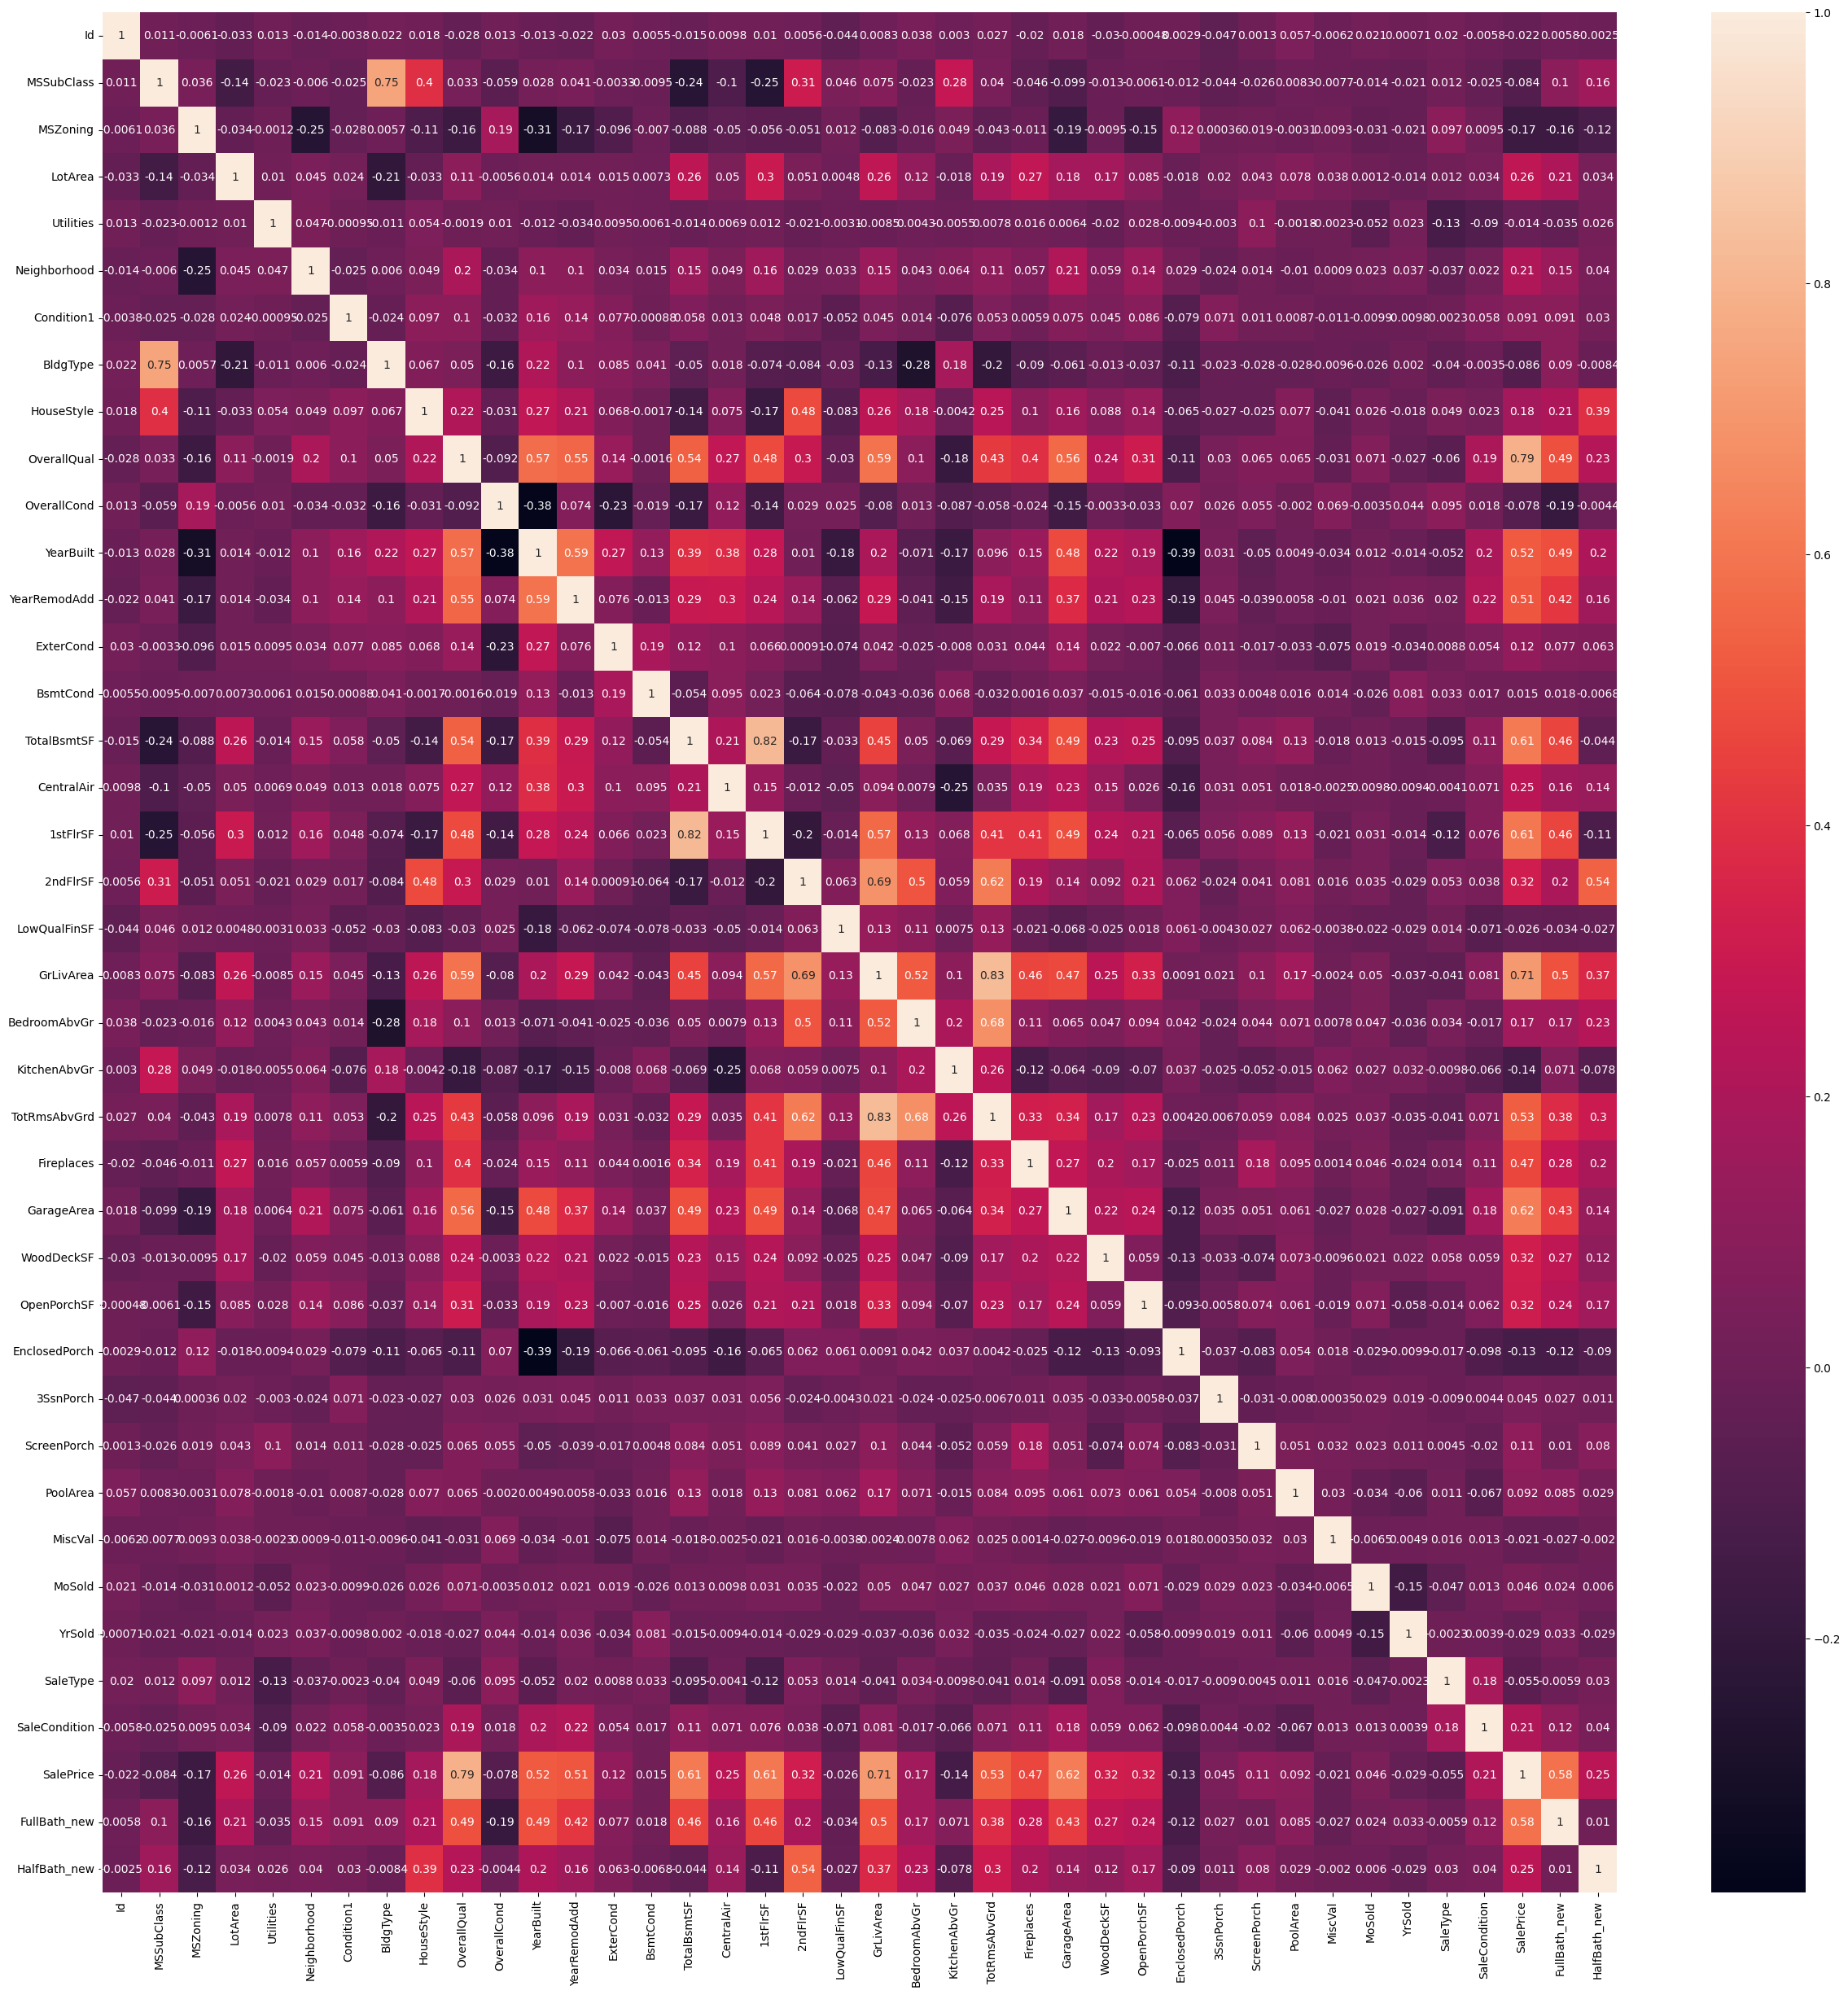

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True);

In [140]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Utilities', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtCond', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'FullBath_new', 'HalfBath_new'],
      dtype='object')

In [142]:
X = df.loc[:,['MSSubClass', 'MSZoning', 'LotArea', 'Utilities',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond', 'BsmtCond',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition','FullBath_new', 'HalfBath_new']]
y = df['SalePrice']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [144]:
print("X_train", X_train.shape)
print("X_train", X_test.shape)
print("X_train", y_train.shape)
print("X_train", y_test.shape)

X_train (1168, 38)
X_train (292, 38)
X_train (1168,)
X_train (292,)


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {mse}")

RMSE: 37063.47093387045


In [147]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators":[30],
    "max_depth": [None],
    "min_samples_split":[2],
    "min_samples_leaf":[1],
 
    "max_features":[2],
}

rf = RandomForestRegressor()

clf = GridSearchCV(estimator = rf,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy")

clf.fit(X_train, y_train)

c:\Users\Marta\miniconda3\envs\data_analysis.env\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [2],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [30]},
             scoring='accuracy')

In [149]:
predictions = clf.predict(x_test)


In [151]:
test_data_original = pd.read_csv('data\sample_submission.csv')
submission = pd.DataFrame({'Id': test_data_original['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,121896.666667
1,1462,158735.000000
2,1463,187806.666667
3,1464,188740.000000
4,1465,208356.733333
